In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile
import math

from datetime import datetime
%load_ext tensorboard

In [2]:
class SequenceGenerator(keras.utils.Sequence):
    """
    A keras Sequence to be used as an image generator for the model.
    """

    def __init__(self, x, y, batchsize):
        self.x, self.y, self.batchsize = x, y, batchsize

    def __len__(self):
        return math.ceil(len(self.x) / self.batchsize)

    def names_at_batch(self, idx):
        x_names = self.x[idx * self.batchsize:(idx + 1) * self.batchsize]
        y_names = np.asarray(self.y[idx * self.batchsize:(idx + 1) * self.batchsize])
        return x_names, y_names

    def __getitem__(self, idx):
        x_names = self.x[idx * self.batchsize:(idx + 1) * self.batchsize]
        y_names = np.asarray(self.y[idx * self.batchsize:(idx + 1) * self.batchsize])

        # open x image names, resize, normalise and make a numpy array
        x1 = np.asarray([preprocess_input(img_to_array(load_img(file_name[0], target_size=(299, 299)))) for file_name in x_names])
        x2 = np.asarray([preprocess_input(img_to_array(load_img(file_name[1], target_size=(299, 299)))) for file_name in x_names])
        x3 = np.asarray([preprocess_input(img_to_array(load_img(file_name[2], target_size=(299, 299)))) for file_name in x_names])
        # x1 = np.asarray([img_to_array(load_img(file_name[0], target_size=(299, 299))) for file_name in x_names]) / 255.0
        # x2 = np.asarray([img_to_array(load_img(file_name[1], target_size=(299, 299))) for file_name in x_names]) / 255.0
        # x3 = np.asarray([img_to_array(load_img(file_name[2], target_size=(299, 299))) for file_name in x_names]) / 255.0

        return [x1, x2, x3], y_names

    def num_classes(self):
        ret = []
        for cat in self.y:
            if cat not in ret:
                ret.append(cat)
        return len(ret)

In [3]:
def get_filenames_from_dir(directory):
    x = []
    y = []
    category_count = 0
    for category in listdir(directory):
        triplet = []
        if isfile(category):
            continue
        for file in listdir("{0}/{1}".format(directory, category)):
            if file[-3:] != "jpg":
                continue
            triplet.append(("{0}/{1}/{2}".format(directory, category, file), category_count))
            if len(triplet) == 3:
                x.append([img[0] for img in triplet])
                y.append(triplet[0][1])
                triplet = []
        print(f"{category}: {category_count}")
        category_count += 1

    return x, y

In [4]:
# makes arrays of the images and label names
x_names, y_names = get_filenames_from_dir("database")

# 15% of all the images are set aside as the test set
x_train_val, x_test, y_train_val, y_test = train_test_split(x_names, y_names, test_size=0.15, random_state=42)

# 17% of the non-test images are set aside as the validation set
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.17, random_state=42)

1035167: 0
1035185: 1
1035194: 2
1035195: 3
1035204: 4
1035208: 5
1035231: 6
1035290: 7
1035366: 8
1035434: 9
1035542: 10
1035551: 11
1035578: 12
1035864: 13
1035929: 14
1035931: 15
1036066: 16
1036128: 17
1036154: 18
1036192: 19
1036203: 20
1036216: 21
1036255: 22
1036286: 23
1036789: 24
1036796: 25
1036893: 26
1036899: 27
1036917: 28
1036958: 29
1037293: 30
1037319: 31
1037633: 32
4308786: 33
4308787: 34
4308789: 35
4308790: 36
4308800: 37
4308801: 38
4308804: 39
4308805: 40
4308806: 41
4308807: 42
4308811: 43
4308812: 44
4308815: 45
4470539: 46
4470555: 47
4470765: 48
4470801: 49
4471071: 50
4471113: 51
4471202: 52
4471235: 53
4471238: 54
4471269: 55
4472828: 56
4472849: 57
4472858: 58
4472884: 59
4472897: 60
4472900: 61
4472907: 62
4472913: 63
4472929: 64
4473127: 65
4473277: 66
4473297: 67
4473319: 68
4473320: 69
4473617: 70
4473795: 71
4473834: 72
4473860: 73
4473874: 74
4473903: 75
4473974: 76
4474146: 77
4474169: 78
4474653: 79
4474780: 80
4474861: 81
4474974: 82
4474998: 83
44

In [5]:
# make generators with batch size 32 for each set
train_gen = SequenceGenerator(x_train, y_train, 4)
val_gen = SequenceGenerator(x_val, y_val, 4)
test_gen = SequenceGenerator(x_test, y_test, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[array([[[[-0.01960784,  0.02745104, -0.00392157],
         [-0.02745098,  0.0196079 , -0.01176471],
         [-0.03529412,  0.01176476, -0.01960784],
         ...,
         [-0.00392157,  0.04313731,  0.02745104],
         [-0.00392157,  0.04313731,  0.02745104],
         [-0.01176471,  0.03529418,  0.0196079 ]],

        [[-0.04313725,  0.02745104,  0.00392163],
         [-0.05882353,  0.01176476, -0.01176471],
         [-0.04313725,  0.00392163, -0.01176471],
         ...,
         [ 0.00392163,  0.04313731,  0.06666672],
         [-0.00392157,  0.03529418,  0.05882359],
         [-0.01176471,  0.02745104,  0.05098045]],

        [[-0.05882353,  0.01176476,  0.00392163],
         [-0.05098039,  0.0196079 ,  0.01176476],
         [-0.04313725,  0.02745104,  0.0196079 ],
         ...,
         [ 0.0196079 ,  0.05882359,  0.082353  ],
         [ 0.01176476,  0.05098045,  0.07450986],
         [ 0.00392163,  0.04313731,  0.06666672]],

        ...,

        [[ 0.01176476,  0.07450986,  

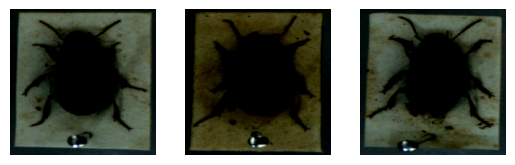

In [6]:
ims, ys = train_gen.__getitem__(0)
print(ims)
c = 1
for i in ims:
    plt.subplot(1, 3, c)
    print(i[0].shape)
    plt.imshow(i[0])
    plt.axis('off')
    c += 1

plt.show()

In [7]:
# Model 1
base_model1 = InceptionV3(weights="imagenet")
for layer in base_model1.layers:
    layer._name += "_1"
    layer.trainable = True

# Model 2
base_model2 = InceptionV3(weights="imagenet")
for layer in base_model2.layers:
    layer._name += "_2"
    layer.trainable = True

# Model 3
base_model3 = InceptionV3(weights="imagenet")
for layer in base_model3.layers:
    layer._name += "_3"
    layer.trainable = True

In [8]:
out_layer = keras.layers.add([base_model1.layers[-2].output, base_model2.layers[-2].output, base_model3.layers[-2].output])
predictions = keras.layers.Dense(291, activation='softmax')(out_layer)

model = keras.Model(inputs=[base_model1.input, base_model2.input, base_model3.input], outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_1 (InputLayer)          [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
input_2_2 (InputLayer)          [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
input_3_3 (InputLayer)          [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1_1[0][0]                  
______________________________________________________________________________________________

In [10]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [11]:
model.fit(train_gen, validation_data=val_gen, callbacks=[tensorboard_callback], epochs=20)

C:\Users\zacoa\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/20
3709/3709 [==============================] - 823s 213ms/step - loss: 5.5366 - accuracy: 0.0160 - val_loss: 14.3850 - val_accuracy: 0.0095
Epoch 2/20
3709/3709 [==============================] - 770s 208ms/step - loss: 5.1153 - accuracy: 0.0272 - val_loss: 5.6481 - val_accuracy: 0.0494
Epoch 3/20
3709/3709 [==============================] - 779s 210ms/step - loss: 4.6555 - accuracy: 0.0482 - val_loss: 7.9591 - val_accuracy: 0.0355
Epoch 4/20
3709/3709 [==============================] - 783s 211ms/step - loss: 3.9841 - accuracy: 0.1141 - val_loss: 4.4946 - val_accuracy: 0.0800
Epoch 5/20
3709/3709 [==============================] - 786s 212ms/step - loss: 3.2850 - accuracy: 0.2004 - val_loss: 3.9596 - val_accuracy: 0.1642
Epoch 6/20
3709/3709 [==============================] - 775s 209ms/step - loss: 2.7041 - accuracy: 0.2923 - val_loss: 3.9460 - val_accuracy: 0.2294
Epoch 7/20
3709/3709 [==============================] - 782s 211ms/step - loss: 2.2335 - accuracy: 0.3859 - val

In [12]:
model.evaluate(test_gen)

789/789 [==============================] - 54s 69ms/step - loss: 1.8096 - accuracy: 0.5951


[1.8095868825912476, 0.5951173305511475]